<a href="https://colab.research.google.com/github/robitussin/CCDEPLRL_EXERCISES/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [18]:
# !wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

In [19]:
# !unzip fruits.zip

Import the libraries

In [20]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

Hyperparameters: Set the image size and batch size

In [21]:
img_height, img_width = 64, 64
batch_size = 50

Split the images into train, validation and test

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


Display sample images from the dataset

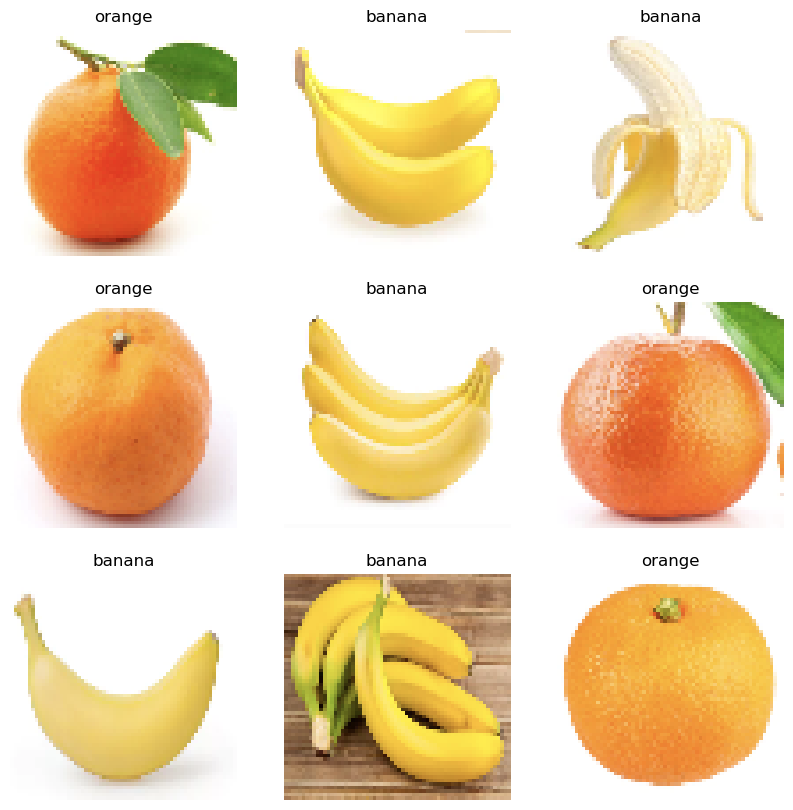

In [23]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [24]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Define the optimizer and loss function

In [26]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [27]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4768 - loss: 1.0423 - val_accuracy: 0.6818 - val_loss: 0.8279
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7575 - loss: 0.7106 - val_accuracy: 0.7727 - val_loss: 0.5051
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8633 - loss: 0.3924 - val_accuracy: 0.7727 - val_loss: 0.5154
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8926 - loss: 0.2822 - val_accuracy: 0.9242 - val_loss: 0.2725
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9456 - loss: 0.1680 - val_accuracy: 0.9242 - val_loss: 0.1920
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9567 - loss: 0.1379 - val_accuracy: 0.9091 - val_loss: 0.2223
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9433 - loss: 0.1393 - val_accuracy: 0.9091 - val_loss: 0.2439
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9632 - loss: 0.0957 - val_accuracy: 0.9697 - v

Test the model

In [28]:
model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9596 - loss: 0.1731


[0.13685500621795654, 0.9692307710647583]

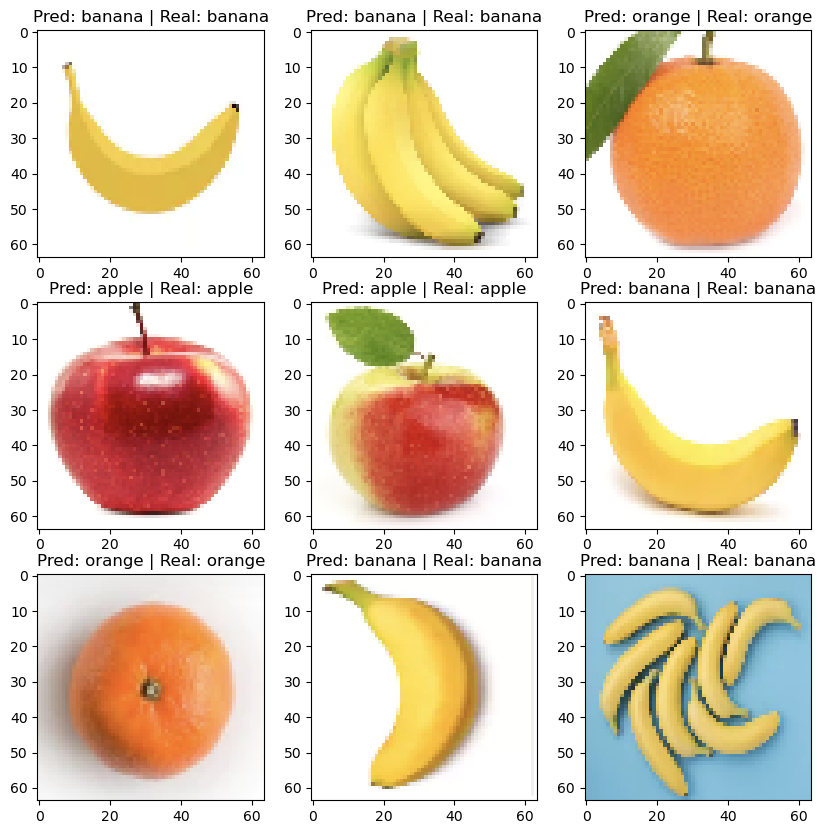

In [29]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpyx5lws7f\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpyx5lws7f\assets


Saved artifact at 'C:\Users\Lenovo\AppData\Local\Temp\tmpyx5lws7f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2623080398912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623080412464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623080412288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623080465152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623080466736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623085494688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623085496448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623085499792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623085494336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623085724240: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Test the Model with Different Dataset

In [31]:
fruits_ds = keras.utils.image_dataset_from_directory(
    './fruit_test', #this is a different dataset
    batch_size=200,
    image_size=(64,64),
)

Found 318 files belonging to 2 classes.


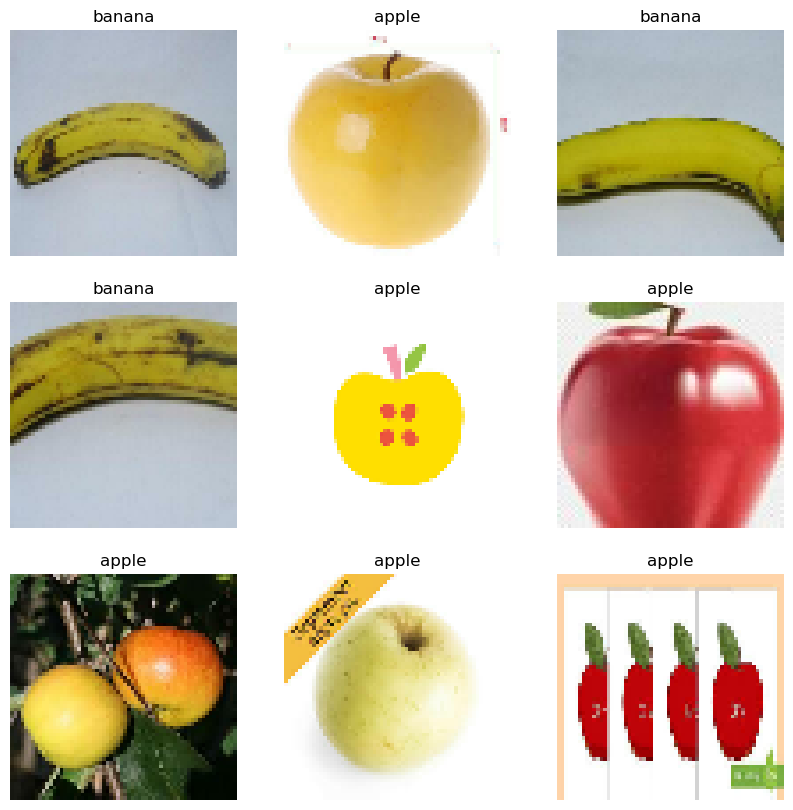

In [32]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in fruits_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

- Codes below were guided by ChatGPT for loading TFlite

In [33]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="./model.tflite")
interpreter.allocate_tensors()

c:\Users\Lenovo\.conda\envs\hipolitoenv\lib\site-packages\tensorflow\lite\python\interpreter.py:451: UserWarning:     Warning: Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


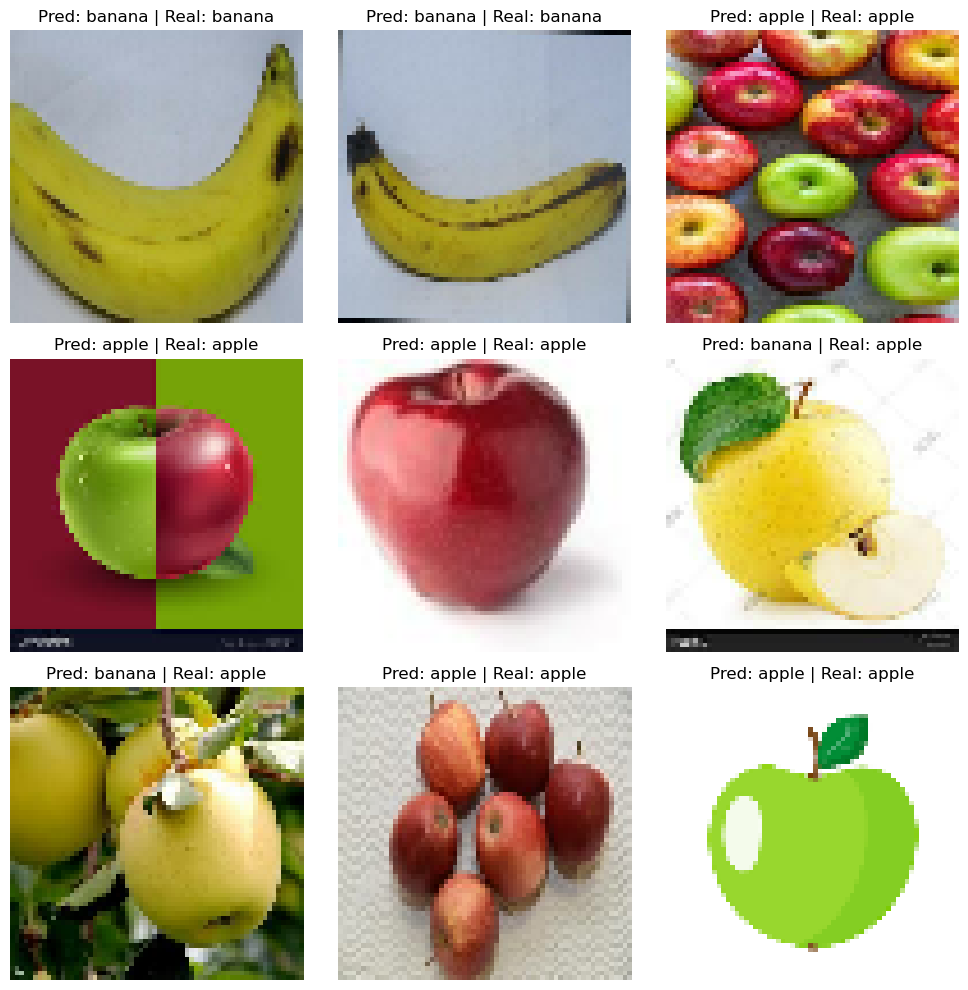

In [34]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test and visualize
plt.figure(figsize=(10, 10))

for images, labels in fruits_ds.take(1):  # Take one batch

    num_to_show = min(9, images.shape[0])  # Don't exceed available images

    for i in range(num_to_show):
        input_data = tf.cast(images[i], tf.float32).numpy()
        input_data = np.expand_dims(input_data, axis=0)

        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])

        predicted_index = np.argmax(output[0])

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[predicted_index]} | Real: {class_names[labels[i]]}")
        plt.axis("off")

plt.tight_layout()
plt.show()
